In [2]:
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zizo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zizo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zizo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zizo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
import seaborn as sns
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import os
#from textblob import Textblob
from nltk.stem import PorterStemmer
#from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error,classification_report
from matplotlib import pyplot as plt, pyplot
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes


In [25]:

news = pd.read_csv('news.csv', sep=',', header=0)
print(news.info())
print()
#print(news.head(10))
print()
#before cleaning
print("Before cleaning")
print()
dataset2 = news.iloc[:, :]
print("# of Rows, # of Columns: ", dataset2.shape)
print("\nColumn Name           # of Null Values\n")
print(dataset2.isnull().sum())
print()

# after clean data
print("After cleaning")
print()
df = news.dropna()
df = df.drop_duplicates()
print(df.isnull().sum())
print()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


Before cleaning

# of Rows, # of Columns:  (6335, 4)

Column Name           # of Null Values

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

After cleaning

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64



In [5]:
# visualization
import plotly.express as ex

ex.pie(df, names='label', title="label", hole=0.20).show()

In [26]:
news['text'] = news['text'].apply(lambda x: " ".join(x.lower() for x in word_tokenize(x)))
stop = stopwords.words('english')
news['text'] = news['text'].apply(lambda x: " ".join(x for x in word_tokenize(x) if x not in stop))
#st = PorterStemmer()
#news['text'] = news['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


lemmatizer=WordNetLemmatizer()
news['text'] =news['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"daniel greenfield , shillman journalism fellow...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,u.s. secretary state john f. kerry said monday...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— kaydee king ( @ kaydeeking ) november 9 , 20...",FAKE
4,875,The Battle of New York: Why This Primary Matters,'s primary day new york front-runner hillary c...,REAL


In [27]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(news['text'], news['label'],test_size=0.20, random_state=0)

# TFIDF feature generation for a maximum of 5000 features

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
#tfidf_vect.fit(news['text'])
# xtrain_tfidf =  tfidf_vect.transform(train_x)
# xtest_tfidf =  tfidf_vect.transform(test_x)
# xtrain_tfidf.data


In [28]:
print("------------ SVM ---------------- ")
model1 =SVC(C=1.0, random_state=0, kernel='rbf')
# model1.fit(xtrain_tfidf, train_y)
# predictions1 = model1.predict(xtest_tfidf)
# accuracy = metrics.accuracy_score(predictions1, test_y)
# mse = metrics.mean_squared_error(predictions1, test_y)
# confusion_mat = metrics.confusion_matrix(predictions1, test_y)
# print("SVM - Accuracy: ", accuracy)
# print("")
# print("")
# print("MSE: ", mse)
# print("")
# print("")
# print("confusion_matrix: ", confusion_mat)
# print("")
# print("")
# print(classification_report(test_y, predictions1))
# print("")
# pyplot.figure(figsize=(12, 10))
# sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
# pyplot.show()


------------ SVM ---------------- 


In [29]:
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', tfidf_vect),
    ('classifier1',model1),
    
])

# Fit the pipeline on training data
pipeline.fit(train_x, train_y)

# Evaluate the pipeline on test data
predictions2 = pipeline.predict(test_x)
accuracy = metrics.accuracy_score(predictions2, test_y)

confusion_mat = metrics.confusion_matrix(predictions2, test_y)
print("SVM - Accuracy: ", accuracy)

print("confusion_matrix: ", confusion_mat)
print(classification_report(test_y, predictions2))




SVM - Accuracy:  0.936069455406472
confusion_matrix:  [[578  44]
 [ 37 608]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       615
           1       0.94      0.93      0.94       652

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



------------ PAC ---------------- 
Accuracy:  0.9273875295974744


MSE:  0.07261247040252565


confusion_matrix:  [[565  42]
 [ 50 610]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.92       615
           1       0.92      0.94      0.93       652

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267




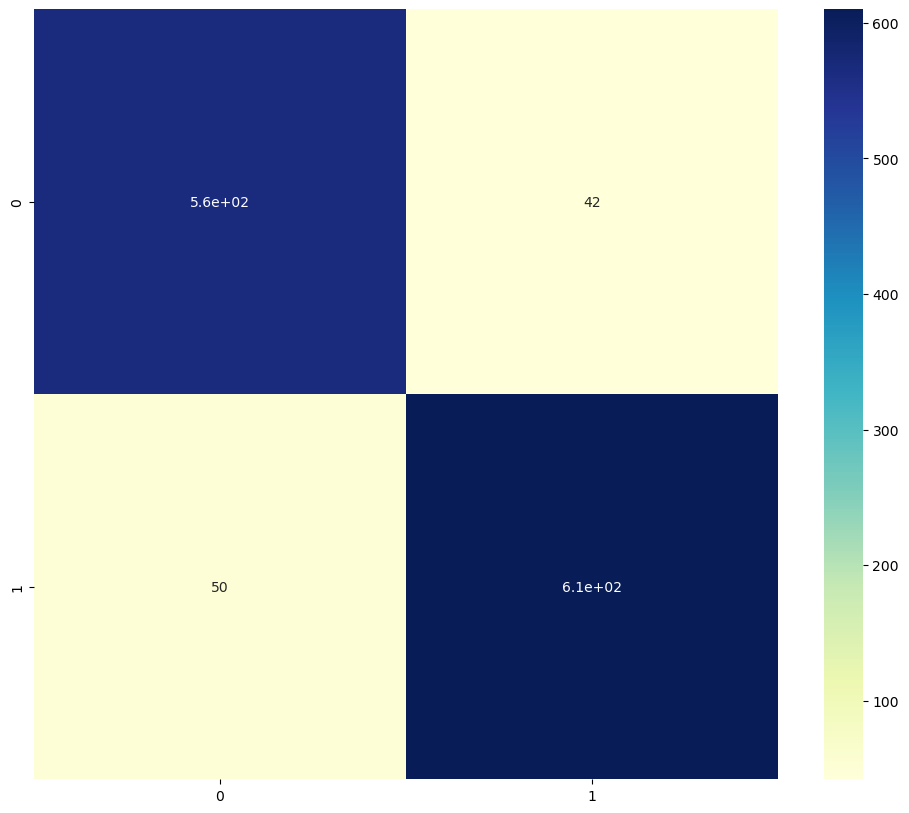

In [ ]:
print("------------ PAC ---------------- ")
model =PassiveAggressiveClassifier(max_iter=100, random_state=42)
model.fit(xtrain_tfidf, train_y)
predictions = model.predict(xtest_tfidf)
accuracy = metrics.accuracy_score(predictions, test_y)
mse = metrics.mean_squared_error(predictions, test_y)
confusion_mat = metrics.confusion_matrix(predictions, test_y)
print("Accuracy: ", accuracy)
print("")
print("")
print("MSE: ", mse)
print("")
print("")
print("confusion_matrix: ", confusion_mat)
print("")
print("")
print(classification_report(test_y, predictions))
print("")
pyplot.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
pyplot.show()

------------ DT ---------------- 
Accuracy:  0.8389897395422258


MSE:  0.16101026045777428


confusion_matrix:  [[521 110]
 [ 94 542]]


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       615
           1       0.85      0.83      0.84       652

    accuracy                           0.84      1267
   macro avg       0.84      0.84      0.84      1267
weighted avg       0.84      0.84      0.84      1267




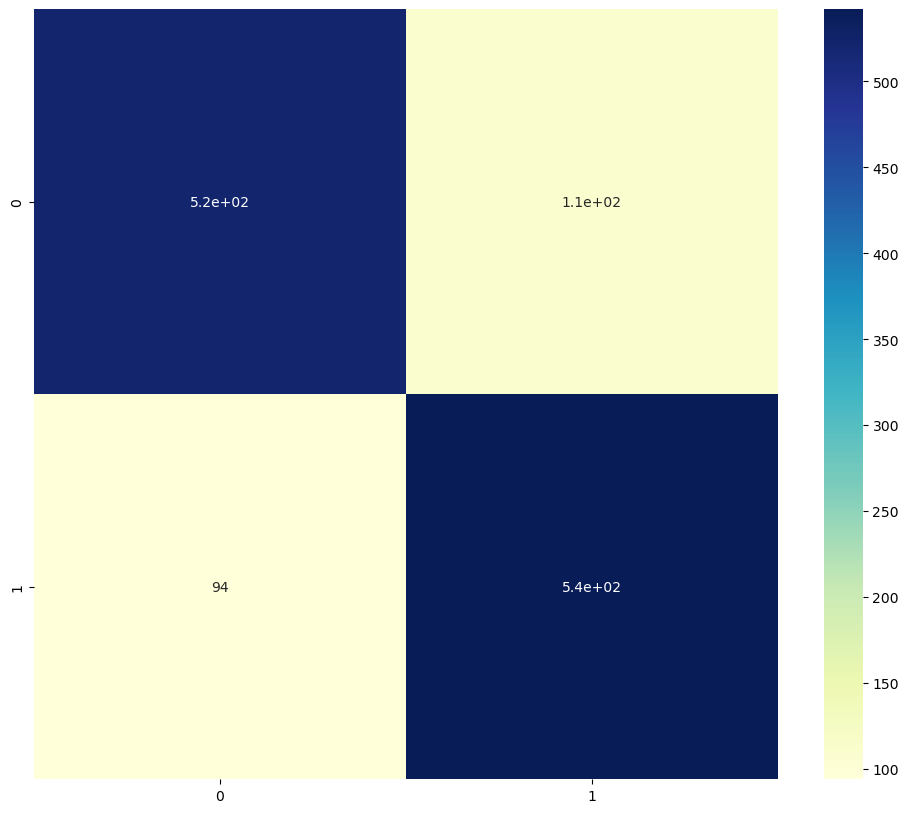

In [ ]:
print("------------ DT ---------------- ")
model =DecisionTreeClassifier( criterion="entropy",max_depth=15, min_samples_leaf=15)
model.fit(xtrain_tfidf, train_y)
predictions = model.predict(xtest_tfidf)
accuracy = metrics.accuracy_score(predictions, test_y)
mse = metrics.mean_squared_error(predictions, test_y)
confusion_mat = metrics.confusion_matrix(predictions, test_y)
print("Accuracy: ", accuracy)
print("")
print("")
print("MSE: ", mse)
print("")
print("")
print("confusion_matrix: ", confusion_mat)
print("")
print("")
print(classification_report(test_y, predictions))
print("")
pyplot.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
pyplot.show()

------------ KNN ---------------- 
Accuracy:  0.8334648776637726


MSE:  0.1665351223362273


confusion_matrix:  [[499  95]
 [116 557]]


              precision    recall  f1-score   support

           0       0.84      0.81      0.83       615
           1       0.83      0.85      0.84       652

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267




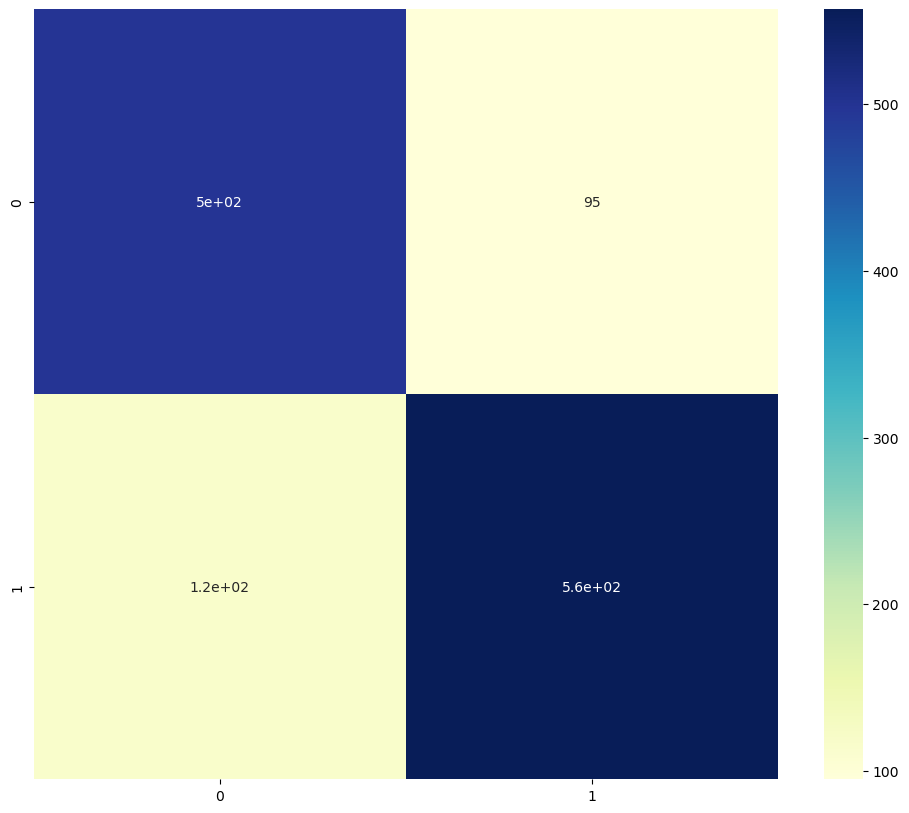

In [ ]:
print("------------ KNN ---------------- ")
model =KNeighborsClassifier(n_neighbors=150)
model.fit(xtrain_tfidf, train_y)
predictions = model.predict(xtest_tfidf)
accuracy = metrics.accuracy_score(predictions, test_y)
mse = metrics.mean_squared_error(predictions, test_y)
confusion_mat = metrics.confusion_matrix(predictions, test_y)
print("Accuracy: ", accuracy)
print("")
print("")
print("MSE: ", mse)
print("")
print("")
print("confusion_matrix: ", confusion_mat)
print("")
print("")
print(classification_report(test_y, predictions))
print("")
pyplot.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
pyplot.show()

------------ LR ---------------- 
Accuracy:  0.925808997632202


MSE:  0.07419100236779795


confusion_matrix:  [[574  53]
 [ 41 599]]


              precision    recall  f1-score   support

           0       0.92      0.93      0.92       615
           1       0.94      0.92      0.93       652

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267




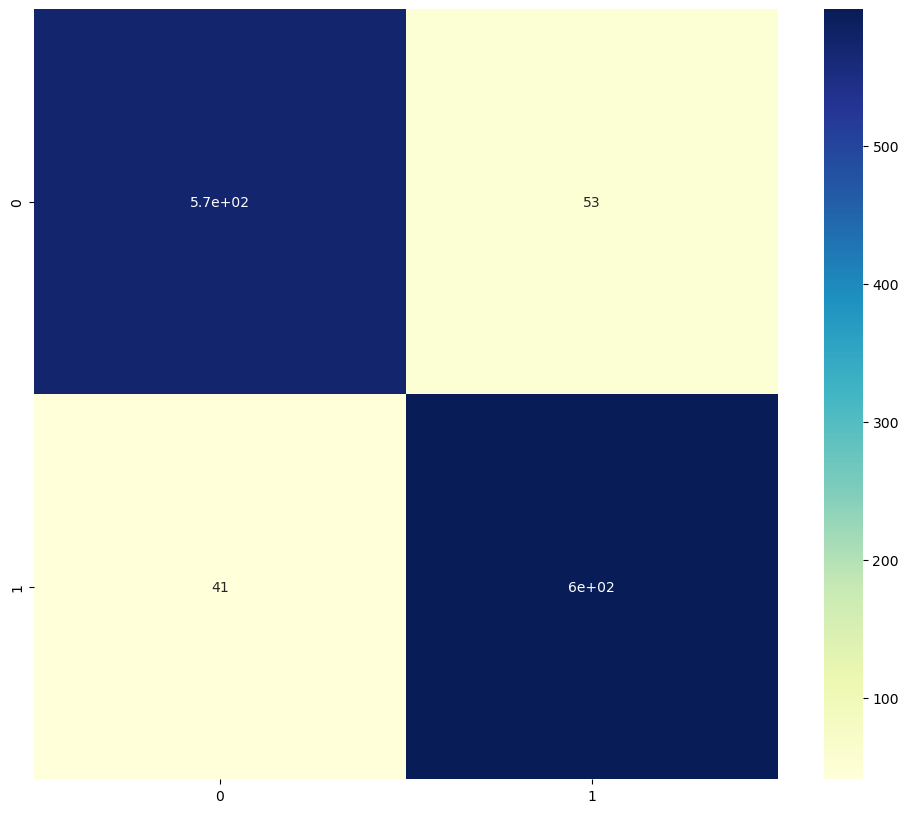

In [ ]:
print("------------ LR ---------------- ")
model =LogisticRegression()
model.fit(xtrain_tfidf, train_y)
predictions = model.predict(xtest_tfidf)
accuracy = metrics.accuracy_score(predictions, test_y)
mse = metrics.mean_squared_error(predictions, test_y)
confusion_mat = metrics.confusion_matrix(predictions, test_y)
print("Accuracy: ", accuracy)
print("")
print("")
print("MSE: ", mse)
print("")
print("")
print("confusion_matrix: ", confusion_mat)
print("")
print("")
print(classification_report(test_y, predictions))
print("")
pyplot.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
pyplot.show()

------------ NV ---------------- 
Accuracy:  0.8863456985003947


MSE:  0.11365430149960537


confusion_matrix:  [[550  79]
 [ 65 573]]


              precision    recall  f1-score   support

           0       0.87      0.89      0.88       615
           1       0.90      0.88      0.89       652

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267




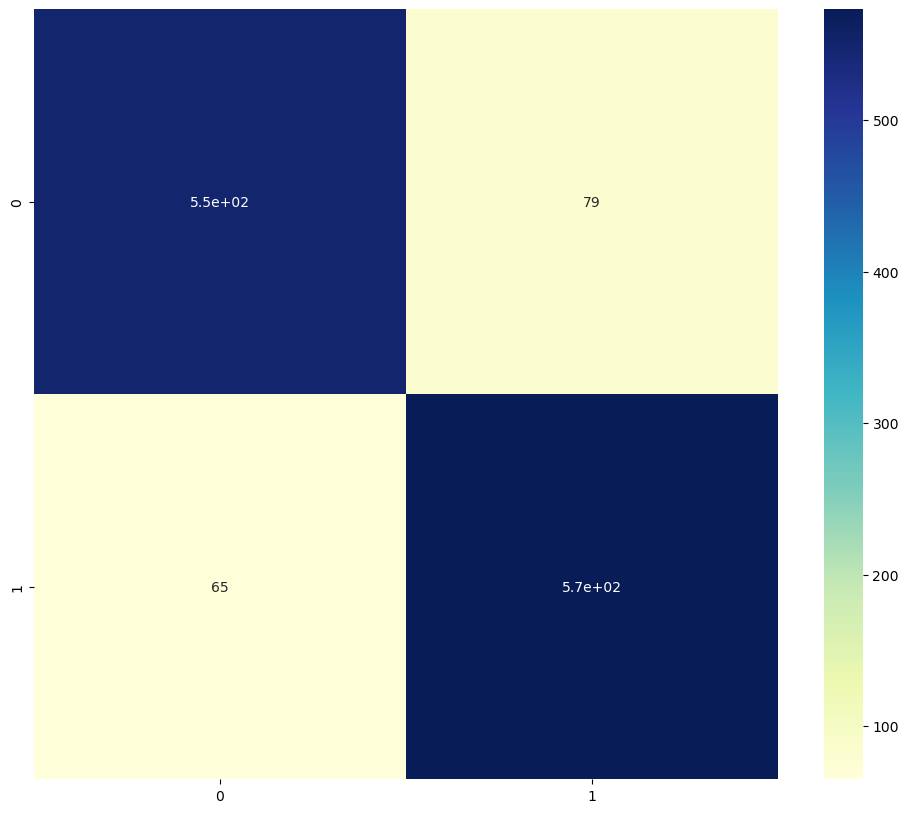

In [ ]:
print("------------ NV ---------------- ")
model =naive_bayes.MultinomialNB(alpha=0.2)
model.fit(xtrain_tfidf, train_y)
predictions = model.predict(xtest_tfidf)
accuracy = metrics.accuracy_score(predictions, test_y)
mse = metrics.mean_squared_error(predictions, test_y)
confusion_mat = metrics.confusion_matrix(predictions, test_y)
print("Accuracy: ", accuracy)
print("")
print("")
print("MSE: ", mse)
print("")
print("")
print("confusion_matrix: ", confusion_mat)
print("")
print("")
print(classification_report(test_y, predictions))
print("")
pyplot.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
pyplot.show()



In [30]:

import joblib
joblib_file="Fake_news_model"
joblib.dump(pipeline,joblib_file)

loaded_model=joblib.load(open(joblib_file,'rb'))
#x_test_pred=loaded_model.predict(xtest_tfidf)
result=np.round(accuracy_score(test_y,predictions2),2)
print(result)

0.94
